In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

****Cargar dataset:****

In [69]:
url = "https://docs.google.com/spreadsheets/d/1_tonZboft-J4KUdys0cW3uBbdoVtuDpDWNRGAnkPQlo/pub?output=csv"
dataset = read_csv(url)

<ipython-input-69-f50a2cf5f7e4>:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



**Verificar y limpiar los datos:**

In [70]:
#Ajustes de tipos de datos
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Close'] = dataset['Close'].replace(',', '', regex=True)
dataset['Close'] = dataset['Close'].astype('float64')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407843 entries, 0 to 1407842
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1407843 non-null  datetime64[ns]
 1   Symbol  1407843 non-null  object        
 2   Close   1407843 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.2+ MB


In [71]:
#Ordenar lista por Symbol y Date
dataset = dataset.sort_values(['Symbol', 'Date'])

In [7]:
dataset.head()

,Date,Symbol,Close
32466,2010-01-04,A,20.08
32467,2010-01-05,A,19.87
32468,2010-01-06,A,19.80
32469,2010-01-07,A,19.77
32470,2010-01-08,A,19.76


In [8]:
dataset.describe()

,Date,Close
count,1407843,1.407843e+06
mean,2016-02-17 05:30:47.274447616,7.777318e+01
min,2010-01-04 00:00:00,2.000000e-01
25%,2013-03-07 00:00:00,2.596000e+01
50%,2016-03-11 00:00:00,4.632000e+01
75%,2019-02-14 00:00:00,8.381000e+01
max,2021-12-30 00:00:00,5.959330e+03
std,NaN,1.537532e+02


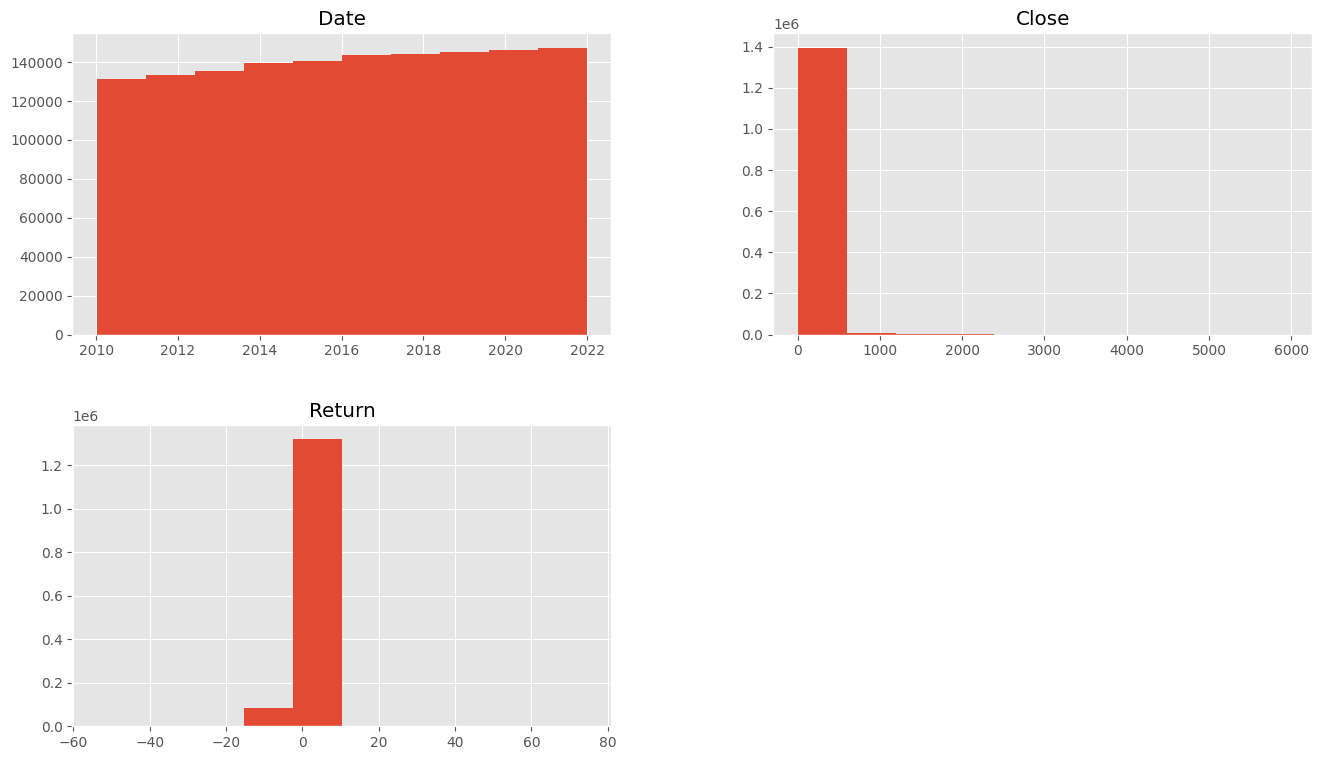

In [199]:
dataset.drop(['Symbol'], axis=1).hist()
plt.show()

**Calcular los retornos porcentuales diarios:**

In [75]:
#Calculo de retorno porcentual diario
dataset['Return'] = dataset.groupby(['Symbol']).Close.pct_change()*100
dataset = dataset.dropna()
dataset

,Date,Symbol,Close,Return
32470,2010-01-08,A,19.76,-0.050582
32471,2010-01-11,A,19.78,0.101215
32472,2010-01-12,A,19.54,-1.213347
32473,2010-01-13,A,19.69,0.767656
32474,2010-01-14,A,19.99,1.523616
...,...,...,...,...
1407838,2021-12-23,ZTS,237.35,0.389122
1407839,2021-12-27,ZTS,241.27,1.651569
1407840,2021-12-28,ZTS,239.05,-0.920131
1407841,2021-12-29,ZTS,241.77,1.137837


**Cálculo de Indicadores de Volatilidad:**

In [146]:
# Agrupar y calcular medidas
dataset_indicadores = dataset.groupby(['Symbol']).Return.agg(['mean', 'std', 'min', 'max', 'var']).reset_index()
dataset_indicadores.head()

,Symbol,mean,std,min,max,var
0,A,0.084822,1.780184,-11.030664,11.754462,3.169056
1,AAL,0.097088,3.319692,-25.224647,41.097046,11.020354
2,AAP,0.079154,1.938293,-20.342720,16.555318,3.756979
3,AAPL,0.125749,1.768144,-12.854610,11.978822,3.126334
4,ABBV,0.092390,1.742799,-16.250800,13.767316,3.037350


In [147]:
#Calcular el rango
dataset_indicadores['rango'] = (dataset_indicadores['max'] - dataset_indicadores['min'])
dataset_indicadores.head()

,Symbol,mean,std,min,max,var,rango
0,A,0.084822,1.780184,-11.030664,11.754462,3.169056,22.785127
1,AAL,0.097088,3.319692,-25.224647,41.097046,11.020354,66.321693
2,AAP,0.079154,1.938293,-20.342720,16.555318,3.756979,36.898038
3,AAPL,0.125749,1.768144,-12.854610,11.978822,3.126334,24.833432
4,ABBV,0.092390,1.742799,-16.250800,13.767316,3.037350,30.018116


In [139]:
#Datos atipicos
print(dataset_indicadores.idxmax(axis=0))

mean    MRNA
std     ENPH
min     OTIS
max      PCG
var     ENPH
dtype: object


**Escalamiento de los Datos**

In [149]:
#Eliminar datos atipicos
dataset_indicadores.drop(dataset_indicadores[dataset_indicadores['Symbol'] == 'MRNA'].index, inplace=True)
dataset_indicadores.drop(dataset_indicadores[dataset_indicadores['Symbol'] == 'ENPH'].index, inplace=True)
dataset_indicadores.drop(dataset_indicadores[dataset_indicadores['Symbol'] == 'OTIS'].index, inplace=True)
dataset_indicadores.drop(dataset_indicadores[dataset_indicadores['Symbol'] == 'PCG'].index, inplace=True)
dataset_indicadores.head()

,Symbol,mean,std,min,max,var,rango
0,A,0.084822,1.780184,-11.030664,11.754462,3.169056,22.785127
1,AAL,0.097088,3.319692,-25.224647,41.097046,11.020354,66.321693
2,AAP,0.079154,1.938293,-20.342720,16.555318,3.756979,36.898038
3,AAPL,0.125749,1.768144,-12.854610,11.978822,3.126334,24.833432
4,ABBV,0.092390,1.742799,-16.250800,13.767316,3.037350,30.018116


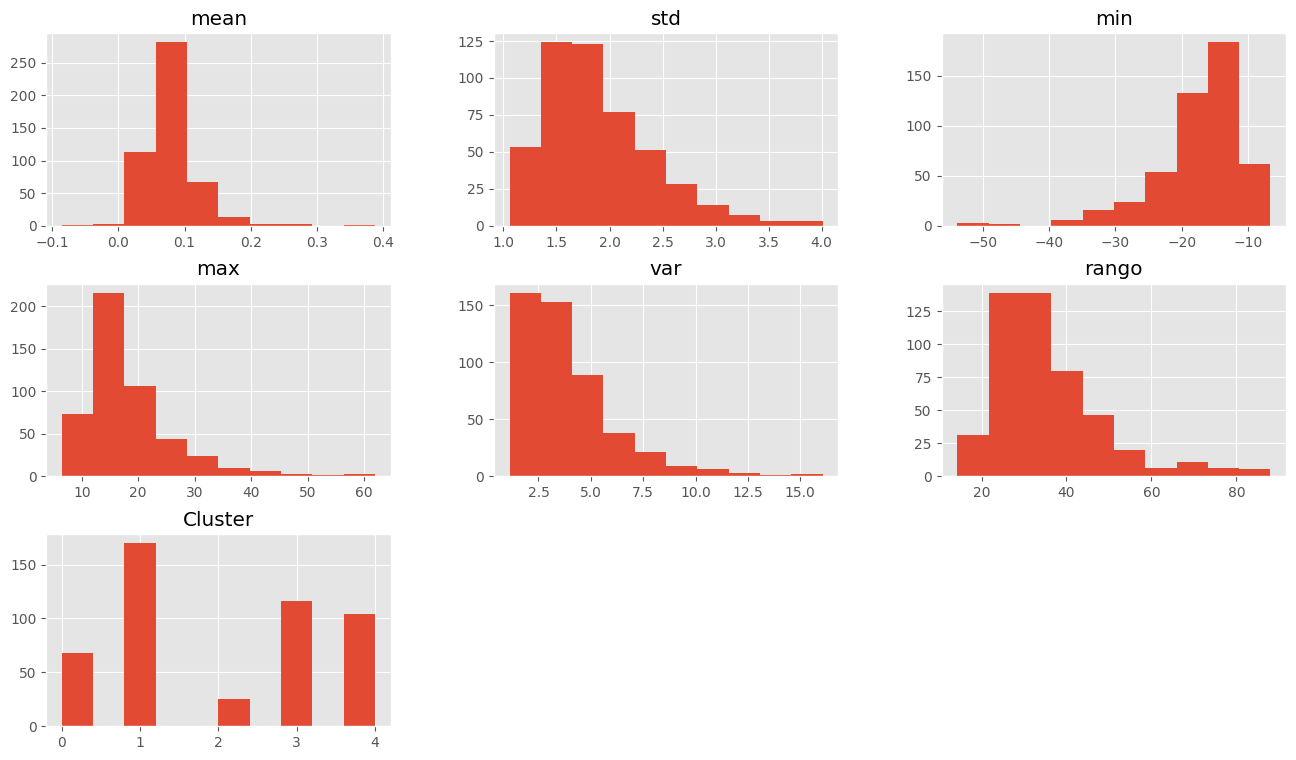

In [198]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
dataset_indicadores.hist()
plt.show()

**Clusterización**

In [162]:
#df_clusters = dataset_indicadores(['mean', 'std', 'min', 'max', 'var']).values
df_clusters = dataset_indicadores[['std', 'rango']].values
#df_clusters

inercia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clusters)
    inercia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

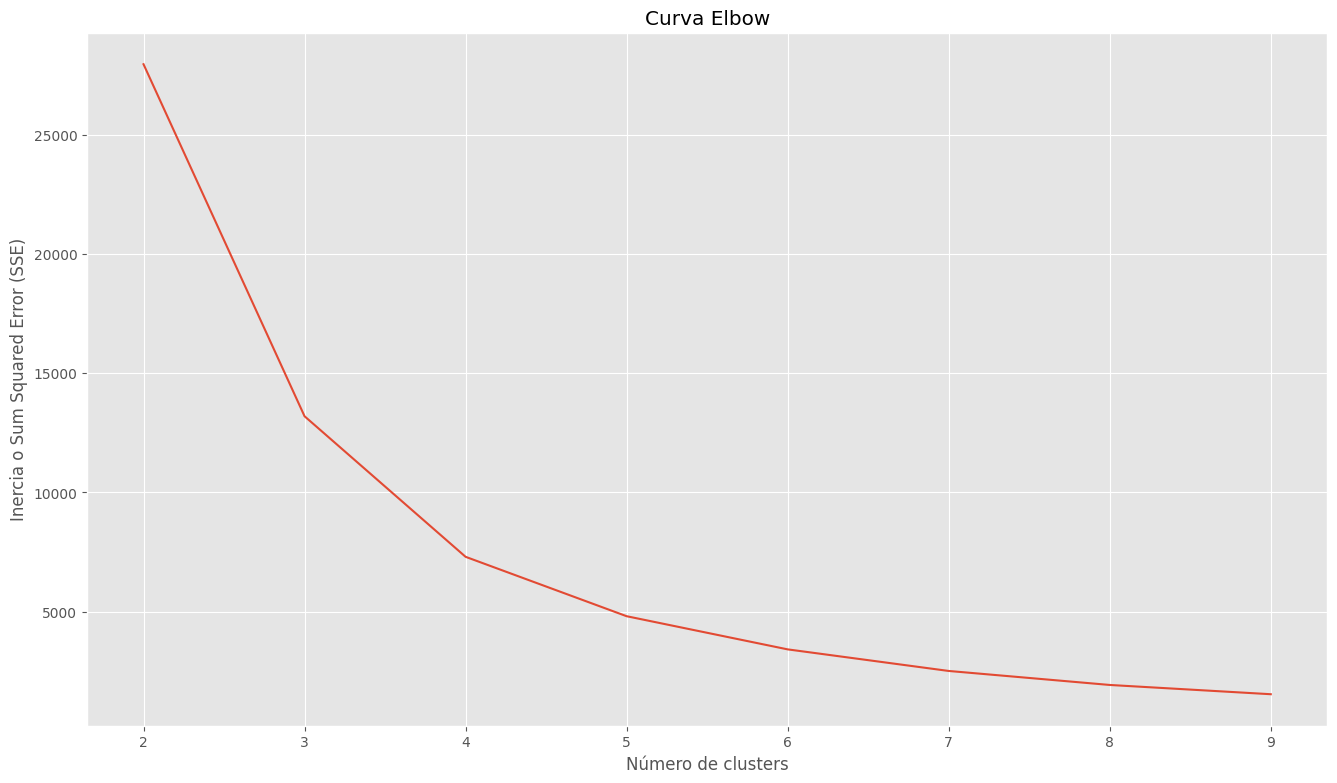

In [200]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), inercia)
plt.title('Curva Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia o Sum Squared Error (SSE)')
plt.show()

In [164]:
# Determinar el número de clusters: 5
kmeans = KMeans(n_clusters=5).fit(df_clusters)
labels = kmeans.labels_
dataset_indicadores['Cluster'] = labels
dataset_indicadores.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Symbol,mean,std,min,max,var,rango,Cluster
0,A,0.084822,1.780184,-11.030664,11.754462,3.169056,22.785127,3
1,AAL,0.097088,3.319692,-25.224647,41.097046,11.020354,66.321693,2
2,AAP,0.079154,1.938293,-20.342720,16.555318,3.756979,36.898038,4
3,AAPL,0.125749,1.768144,-12.854610,11.978822,3.126334,24.833432,3
4,ABBV,0.092390,1.742799,-16.250800,13.767316,3.037350,30.018116,1


In [165]:
returns_sample_name = dataset_indicadores.columns
returns_sample_name
dataset_indicadores

,Symbol,mean,std,min,max,var,rango,Cluster
0,A,0.084822,1.780184,-11.030664,11.754462,3.169056,22.785127,3
1,AAL,0.097088,3.319692,-25.224647,41.097046,11.020354,66.321693,2
2,AAP,0.079154,1.938293,-20.342720,16.555318,3.756979,36.898038,4
3,AAPL,0.125749,1.768144,-12.854610,11.978822,3.126334,24.833432,3
4,ABBV,0.092390,1.742799,-16.250800,13.767316,3.037350,30.018116,1
...,...,...,...,...,...,...,...,...
482,YUM,0.076562,1.551939,-18.844567,23.238897,2.408515,42.083464,4
483,ZBH,0.039529,1.632878,-13.994820,15.582531,2.666289,29.577351,1
484,ZBRA,0.125811,2.181319,-23.845874,17.214210,4.758151,41.060085,4
485,ZION,0.073178,2.193031,-12.059308,23.868899,4.809386,35.928207,4


In [201]:
import plotly.express as px

fig = px.scatter(dataset_indicadores, x="std", y="rango",
                 color="Cluster",
                 color_continuous_scale="Rainbow",
                 #text="Symbol",
                 hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=True)
fig.update_traces(marker_size=11)
fig.update_traces(textposition='top center')
fig.update_layout(height=500, title_text='Empresas S&P 500 Clusters',font=dict(size=15))
fig.show()

print(px.colors.qualitative.Plotly)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


In [202]:
clusters_df = dataset_indicadores.loc[dataset_indicadores['Cluster'] == 0]

fig = px.scatter(clusters_df, x="std", y="rango", color="Cluster", text="Symbol", hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker_size=10)
fig.update_traces(textposition='top center')
fig.update_traces(marker=dict(color='purple'))
fig.update_layout(height=600,title_text='Empresas S&P 500 Cluster 0',font=dict(size=15))
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))
fig.update_layout(
xaxis = dict(
tickfont = dict(size=20)))
fig.show()

In [203]:
clusters_df = dataset_indicadores.loc[dataset_indicadores['Cluster'] == 1]

fig = px.scatter(clusters_df, x="std", y="rango", color="Cluster", text="Symbol", hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker_size=10)
fig.update_traces(textposition='top center')
fig.update_traces(marker=dict(color='blue'))
fig.update_layout(height=600,title_text='Empresas S&P 500 Cluster 1',font=dict(size=15))
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))
fig.update_layout(
xaxis = dict(
tickfont = dict(size=20)))
fig.show()

In [204]:
clusters_df = dataset_indicadores.loc[dataset_indicadores['Cluster'] == 2]

fig = px.scatter(clusters_df, x="std", y="rango", color="Cluster", text="Symbol", hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker_size=10)
fig.update_traces(textposition='top center')
fig.update_traces(marker=dict(color='green'))
fig.update_layout(height=500,title_text='Empresas S&P 500 Cluster 2',font=dict(size=15))
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))
fig.update_layout(
xaxis = dict(
tickfont = dict(size=20)))
fig.show()

In [205]:
clusters_df = dataset_indicadores.loc[dataset_indicadores['Cluster'] == 3]

fig = px.scatter(clusters_df, x="std", y="rango", color="Cluster", text="Symbol", hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker_size=10)
fig.update_traces(textposition='top center')
fig.update_traces(marker=dict(color='yellow'))
fig.update_layout(height=600,title_text='Empresas S&P 500 Cluster 3',font=dict(size=15))
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))
fig.update_layout(
xaxis = dict(
tickfont = dict(size=20)))
fig.show()

In [206]:
clusters_df = dataset_indicadores.loc[dataset_indicadores['Cluster'] == 4]

fig = px.scatter(clusters_df, x="std", y="rango", color="Cluster", text="Symbol", hover_data=["Symbol"])
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker_size=10)
fig.update_traces(textposition='top center')
fig.update_traces(marker=dict(color='red'))
fig.update_layout(height=800,title_text='Empresas S&P 500 Cluster 4',font=dict(size=15))
fig.update_layout(
yaxis = dict(
tickfont = dict(size=20)))
fig.update_layout(
xaxis = dict(
tickfont = dict(size=20)))
fig.show()

In [207]:
clusters_df= dataset_indicadores.groupby('Cluster').Symbol.count()
clusters_df.head()

,Symbol
Cluster,
0,68
1,170
2,25
3,116
4,104


**Análisis e Interpretación**

**Interpretar los resultados:**

Cluster 0
1.   Podemos observa un total de 68 empresas agrupadas en este cluster.
2.   En este cluster predominan las empresas con un rango de retorno diario entre 44,00 y 60,00.

Cluster 1
1.   Podemos observa un total de 170 empresas agrupadas en este cluster.
2.   En este cluster predominan las empresas con un rango de retorno diario entre 26,00 y 34,00.

Cluster 2
1.   Podemos observa un total de 25 empresas agrupadas en este cluster.
2.   En este cluster predominan las empresas con un rango de retorno diario entre 61,00 y 88,00.

Cluster 3
1.   Podemos observa un total de 116 empresas agrupadas en este cluster.
2.   En este cluster predominan las empresas con un rango de retorno diario entre 14,00 y 26,00.

Cluster 4
1.   Podemos observa un total de 104 empresas agrupadas en este cluster.
2.   En este cluster predominan las empresas con un rango de retorno diario entre 34,00 y 43,00.


**Consluciones:**


*   Se observa que la clusterización identifica un patrón de agrupamiento según las variables.

